En esta práctica vamos a construir, con python, modelos sencillos de regresión lineal para predecir el valor de una variable y a partir de otra x. Jugaremos con distintos tipos de problemas y con distintos tipos de kernel para intentar responder a las cuestiones que se plantean a continuación.

Para implementar los modelos utilizaremos la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge">KernelRigde</a> del paquete *sklearn.kernel_ridge*.

Para empezar, vamos a importar las librerías *numpy* y *matplotlib.pyplot*, así como la clase *KernelRidge*, y vamos a fijar la semilla del generador de números aleatorios para que nuestros resultados sean reproducibles.

In [1]:
import numpy as np
import numpy.matlib as matl
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
np.random.seed(13)

Lo que viene a continuación es la definición de la función que usaremos para crear los conjuntos de datos, que hemos llamado *createDataSet*. La función necesita los tres argumentos que se describen a continuación:

- *n* es el número de puntos a generar
- *s* es la magnitud del ruido
- *model* es el modelo que genera los datos, puede ser 'linear', 'square' o 'sine'

In [2]:
def createDataSet(n,s,model):
    x = np.random.rand(n, 1)*2.0*np.pi

    if model == 'sine':
        y = np.sin(x) + np.random.randn(n, 1)*s
    elif model == 'linear':
        y = x + np.random.randn(n, 1)*s
    elif model == 'square':
        y = x*x + np.random.randn(n, 1)*s
    else:
        y = x + np.random.randn(n, 1)*s

    return x, y

También vamos a crear una función para dibujar gráficas.

In [3]:
def plotData(x,y,style,taxis,title):
    plt.plot(x,y,style)
    plt.grid(True)
    plt.axis(taxis)
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title(title)

En primer lugar vamos a crear un problema lineal con dos conjuntos de datos, uno de entrenamiento y otro de test.

In [4]:
noise = 0.2
model = 'linear'
xtrain, ytrain = createDataSet(10, noise, model)
xtest, ytest = createDataSet(10, noise, model)

La siguiente celda muestra las gráficas de y frente a x para los dos conjuntos de datos generados.

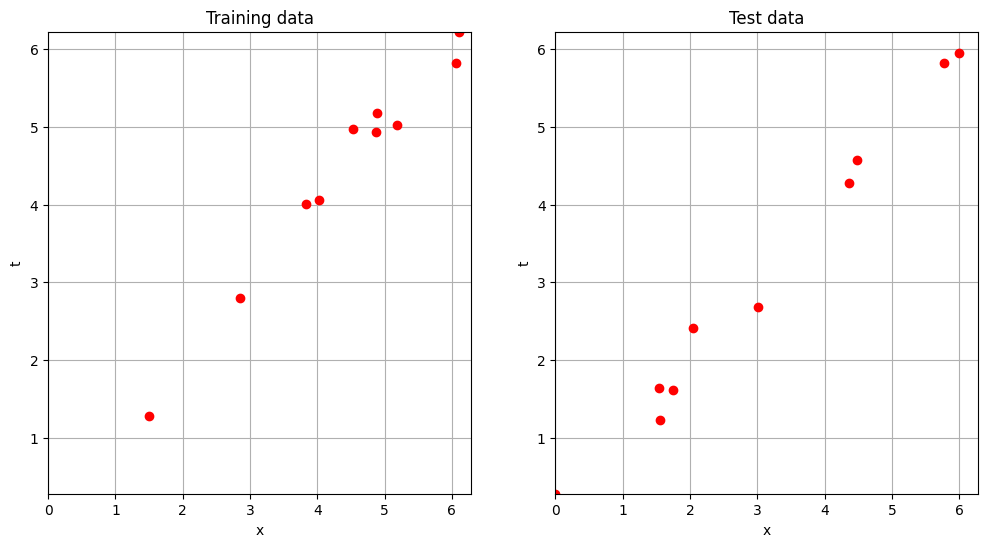

In [5]:
# Ejes comunes a las dos figuras:
taxis = [0, 2*np.pi, min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())]

plt.figure(figsize=(12,6))

# Figura para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"Training data")

# Figura para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"Test data")

A continuación creamos el modelo de regresión utilizando la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge">KernelRidge</a>. El constructor de la clase requiere los siguientes parámetros:

- *alpha*, es un parámetro de regularización, valores más altos implican modelos más simples

- *kernel*, es el tipo de kernel, en esta práctica usaremos los valores 'poly' (para kernels polinómicos) y 'rbf' (para kernels RBF)

- *degree*, valor del exponente P en el kernel polinómico

- *coef0*, valor de la constante C en el kernel polinómico

- *gamma*, valor del parámetro del kernel RBF, equivale a $1/2\sigma^{2}$ en la notación que hemos usado nosotros

Empezamos con un modelo lineal, para ello elegimos *kernel='poly'*, *degree=1* y *coef0=1*. El valor de *alpha* lo ponemos a 0.001, y el valor de *gamma* es irrelevante.

In [6]:
clf = KernelRidge(alpha=0.001, kernel='poly', degree=1, coef0=1, gamma=None)

Para ajustar el modelo a los datos utilizamos el método *fit* pasándole los datos del conjunto de entrenamiento.

In [7]:
clf.fit(xtrain, ytrain)

KernelRidge(alpha=0.001, degree=1, kernel='poly')

A continuación vamos a aplicar el modelo para predecir la variable y a partir de x, tanto en los datos de entrenamiento como en los de test. Para eso usamos el método *predict*.

In [8]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

Ahora vamos a calcular el error cometido tanto en el conjunto de entrenamiento como en el de test. Para ello comparamos los valores reales de *y* con los obtenidos a partir del modelo.

In [9]:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

Score en entrenamiento = 0.978082
Score en test = 0.984620


Y finalmente vamos a volver a pintar los datos, pero superponiendo una gráfica que representa el modelo obtenido (línea azul).

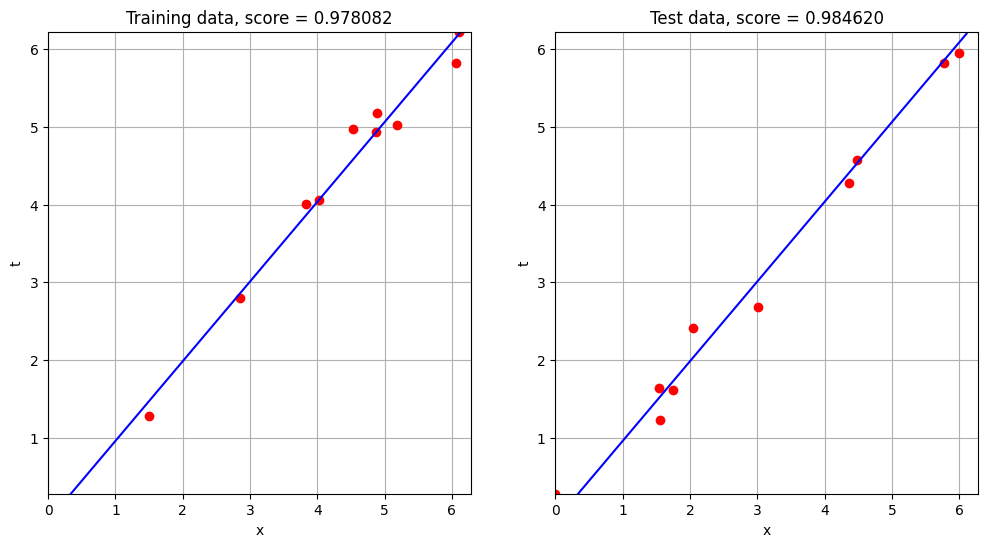

In [10]:
# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

plt.figure(figsize=(12,6))

# Figura para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Figura para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(xtest, ytest)))

La celda que sigue contiene todo el código anterior junto, para que te resulte más fácil hacer pruebas. Puedes obtener distintos conjuntos de datos y ajustar distintos modelos simplemente editando el código que aparece en ella. Los comentarios en el código indican los parámetros con los que te sugerimos que juegues. Haz las pruebas necesarias y responde a las preguntas planteadas al final.

Score en entrenamiento = 0.978082
Score en test = 0.984620


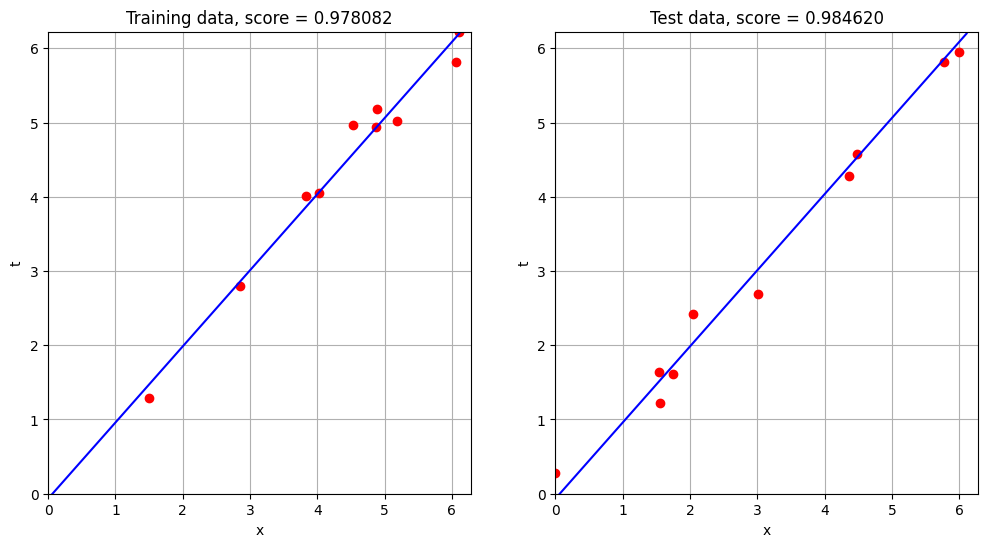

In [11]:
# Generación de los datos:
# Puedes jugar con el tipo de modelo, 'linear', 'sine' o 'square', y con
# el nivel de ruido.
np.random.seed(13)
noise = 0.2
model = 'linear'
xtrain, ytrain = createDataSet(10,noise,model)
xtest, ytest = createDataSet(10,noise,model)

# Construcción del modelo:
# Puedes jugar con los parámetros de KernelRidge.
clf = KernelRidge(alpha=0.001, kernel='poly', degree=1, coef0=1, gamma=None)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Cálculo de la bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=100)[:, None]
yplot = clf.predict(xplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, max(ytrain.max(), ytest.max())]
plt.figure(figsize=(12,6))

# Para los datos de training:
plt.subplot(121)
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Para los datos de test:
plt.subplot(122)
plotData(xtest,ytest,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Test data, score = %f" % (clf.score(xtest, ytest)))

### Responde razonadamente a las siguientes cuestiones:

(1) Ejecuta el código con los valores iniciales, y luego cambiando el valor del exponente a diferentes valores entre 1 y 5.

  - ¿Con qué kernel se obtiene un mejor resultado sobre el conjunto de entrenamiento?
  
  - ¿Con qué kernel se obtiene un mejor resultado sobre el conjunto de test?
  
  
(2) Cambia el valor del parámetro C a 0 y ejecuta de nuevo las pruebas anteriores. Compara los resultados con los que obtuviste antes y explica las diferencias observadas.


(3) Finalmente cambia el tipo de kernel a RBF (prueba con diferentes valores del parámetro gamma) y explica lo que observas.


(4) Repite las pruebas anteriores con los otros dos tipos de problemas ('square' y 'sine') y explica lo que observas. Indica los parámetros que funcionan mejor para cada uno de los problemas.


(5) Si quieres, prueba a jugar con otros parámetros (parámetro de regularización, número de puntos, nivel de ruido) e intenta explicar lo que sucede en cada caso.

---
### Entendiendo el concepto de kernel. El kernel gausiano.

A continuación vamos a resolver el problema anterior y vamos a intentar profundizar un poco para entender el concepto de kernel en el caso gausiano. Vamos a trabajar sólo con el conjunto de entrenamiento.

Score en entrenamiento = 0.998499


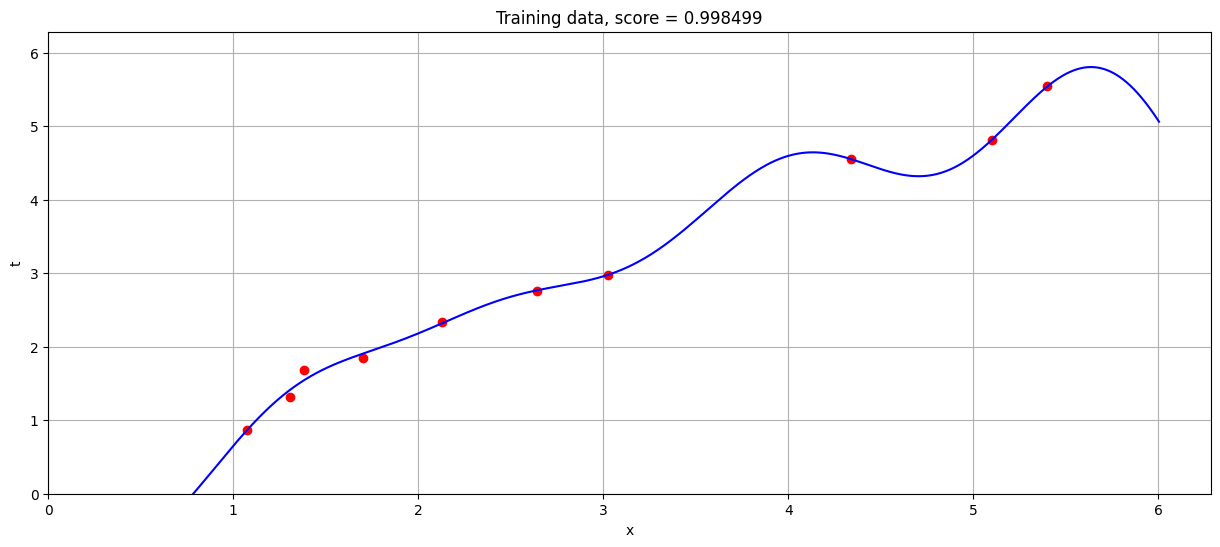

In [12]:
# Generación de los datos:
np.random.seed(22)
noise = 0.2
model = 'linear'
xtrain, ytrain = createDataSet(10,noise,model)
mygamma = 1.0

# Construcción del modelo:
clf = KernelRidge(alpha=0.001, kernel='rbf', gamma=mygamma)
#clf = KernelRidge(alpha=0.001, kernel='poly', coef0=1.0, degree=1.0) # Para analizar el kernel lineal
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)

# Bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))

# Variables para el plot del modelo
xplot = np.linspace(min(xtrain.min(),xtest.min()),max(xtrain.max(),xtest.max()),num=1000)[:, None]
yplot = clf.predict(xplot)

# Gráficas:
taxis = [0, 2*np.pi, 0, 2*np.pi]
plt.figure(figsize=(15,6))

# Para los datos de training:
plotData(xtrain,ytrain,'ro',taxis,"")
plotData(xplot,yplot,'b-',taxis,"Training data, score = %f" % (clf.score(xtrain, ytrain)))

El kernel gausiano tiene esta expresión:

$$
k(z, x) = \exp{\left(-\gamma (z - x)^{2}\right)}
$$

Recuerda que el parámetro $\gamma$ del kernel es inverso a la anchura del mismo, $\gamma = 1/2\sigma^{2}$. A continuación vamos a dibujarlo fijando el valor de $z$ a $0$. Como ves, el kernel es una curva gausiana, al aumentar $\gamma$ disminuye su anchura, al disminuir $\gamma$ la anchura aumenta.

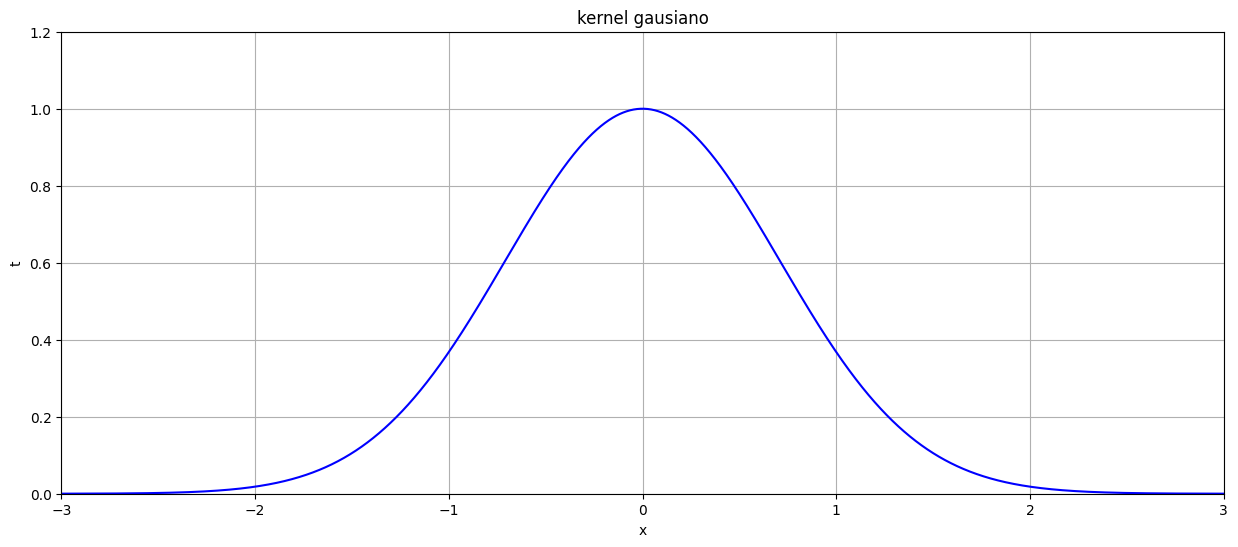

In [13]:
# Dibujamos el kernel para z = 0, es decir k(0, x):
xplot = np.linspace(-10, 10, num=10001)
yplot = np.exp(-mygamma*xplot*xplot)

# Gráfica:
taxis = [-3, 3, 0, 1.2]
plt.figure(figsize=(15, 6))
plotData(xplot, yplot, 'b-', taxis, "kernel gausiano")

Finalmente vamos a calcular la combinación lineal de los kernels evaluados sobre cada uno de los puntos de entrenamiento. Recuerda que:

$$
\hat{y} (x) =  \sum_{i=1}^{N} a_{i} k(x_{i},x) = a_{1} k(x_{1},x) + a_{2} k(x_{2},x) + ... + a_{N} k(x_{N},x)
$$

Los parámetros $a_{i}$ los podemos obtener utilizando el atributo *dual\_coef\_* sobre un objeto de la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge">KernelRigde</a>.


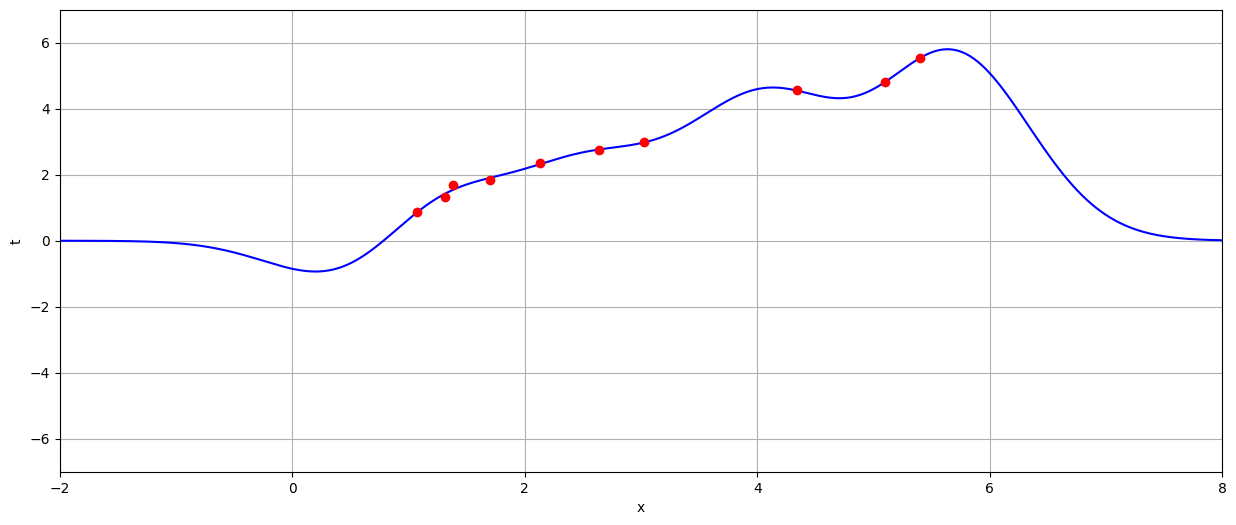

In [14]:
plt.figure(figsize=(15,6))
xplot = np.linspace(-2, 8, num=10001)
ysum = np.zeros_like(xplot)
taxis = [-2, 8, -7, 7]

for x, a in zip(np.ravel(xtrain), np.ravel(clf.dual_coef_)):
    yplot = a*np.exp(-mygamma*(xplot-x)*(xplot-x))
    #yplot = a*(xplot*x + 1.0) # Para analizar el kernel lineal
    ysum = ysum + yplot

plotData(xplot, ysum, 'b-', taxis, "")
plotData(xtrain, ytrain, 'ro', taxis, "")

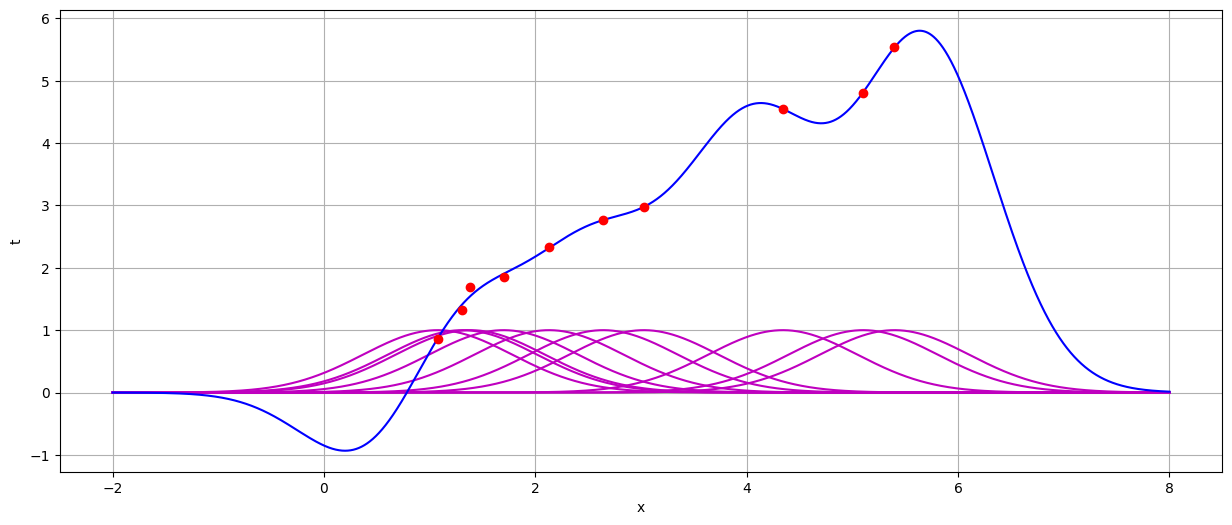

In [15]:
plt.figure(figsize=(15,6))
xplot = np.linspace(-2, 8, num=10001)
ysum = np.zeros_like(xplot)
taxis = [-2, 8, -7, 7]

for x, a in zip(np.ravel(xtrain), np.ravel(clf.dual_coef_)):
    yplot = np.exp(-mygamma*(xplot-x)*(xplot-x))
    #yplot = (xplot*x + 1.0) # Para analizar el kernel lineal
    ysum = ysum + a*yplot
    plt.plot(xplot, yplot,'m-')

plotData(xplot, ysum, 'b-', 'auto', "")
plotData(xtrain, ytrain, 'ro', 'auto', "")

---
### Un problema un poco más realista: California Housing

Para terminar vamos a trabajar con una base de datos un poco más realista, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html">California Housing</a>. La siguiente celda de código carga los datos a partir del fichero *housingND.csv*.

In [16]:
from sklearn.datasets import fetch_california_housing
x, y = fetch_california_housing(return_X_y=True, as_frame=True)
print(x.shape)
print(y.shape)

(20640, 8)
(20640,)


Nos quedamos sólo con los primeros 1000 ejemplos para que las ejecuciones sean más rápidas.

In [17]:
x = x[:1000]
y = y[:1000]

Estandarizamos:

In [18]:
# Estandarizar los datos:
from sklearn.preprocessing import scale
x = scale(x, axis = 0)

Dividimos en training y test:

In [19]:
# Dividimos los datos en dos conjuntos, training y test:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=11)

Modelo lineal:

Score en entrenamiento = 0.622300
Score en test = 0.669648


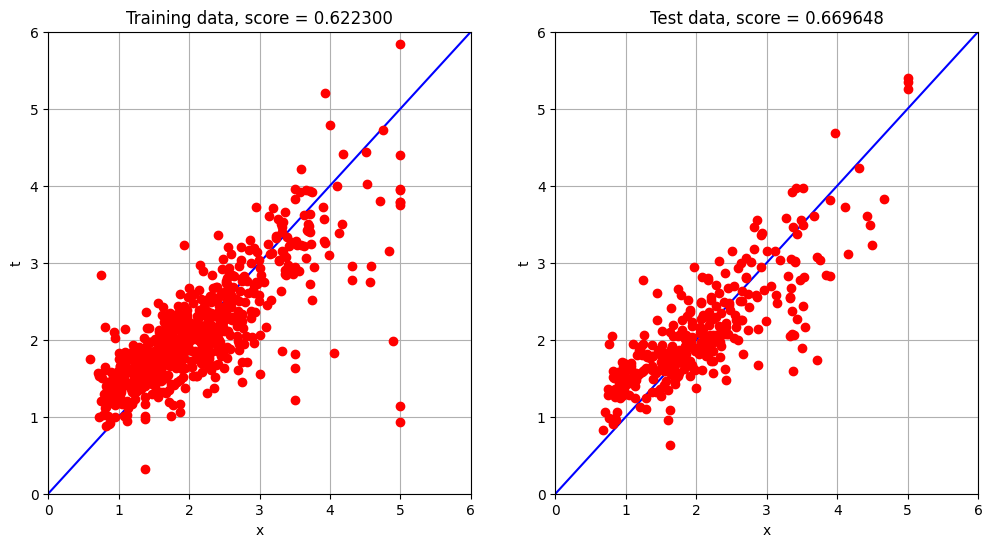

In [20]:
# Construcción de un modelo lineal:
clf = KernelRidge(alpha=0.001, kernel='poly', degree=1, coef0=1, gamma=100)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

# Dibujamos, para training y test, ypred frente a y:
plt.figure(figsize=(12,6))
taxis = [0, 6, 0 , 6]
xplot = [0, 6]

# Datos de training:
plt.subplot(121)
plotData(xplot, xplot, 'b-', taxis, "")
plotData(ytrain, ytrain_pred, 'ro', taxis, "Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Datos de test:
plt.subplot(122)
plotData(xplot, xplot, 'b-', taxis, "")
plotData(ytest, ytest_pred, 'ro', taxis, "Test data, score = %f" % (clf.score(xtest, ytest)))

Modelo no lineal, buscamos los hiperparámetros en un grid:

In [21]:
# Búsqueda de parámetros con grid_search:
from sklearn.model_selection import GridSearchCV

grid = [{'alpha': [0.01, 0.1, 1, 10, 100, 1000],
         'gamma': [0.1, 0.01, 0.001],
         'kernel': ['rbf', 'poly'],
         'degree': [1, 2, 3],
         'coef0': [1.0]},]

clf_gridsearch = GridSearchCV(estimator=KernelRidge(), param_grid=grid, cv=5)
clf_gridsearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KernelRidge(),
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'coef0': [1.0], 'degree': [1, 2, 3],
                          'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'poly']}])

In [22]:
# Imprimimos los resultados para el mejor clasificador:
print("Best score = %f" % (clf_gridsearch.best_score_))
clf = clf_gridsearch.best_estimator_
print("Best model:")
print(clf)

# Aplicamos el mejor clasificador a los ejemplos de entrenamiento y test:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

# Bondad del ajuste:
print("Score en entrenamiento = %f" % (clf.score(xtrain, ytrain)))
print("Score en test = %f" % (clf.score(xtest, ytest)))

Best score = 0.703658
Best model:
KernelRidge(alpha=0.1, coef0=1.0, gamma=0.01, kernel='poly')
Score en entrenamiento = 0.770242
Score en test = 0.730624


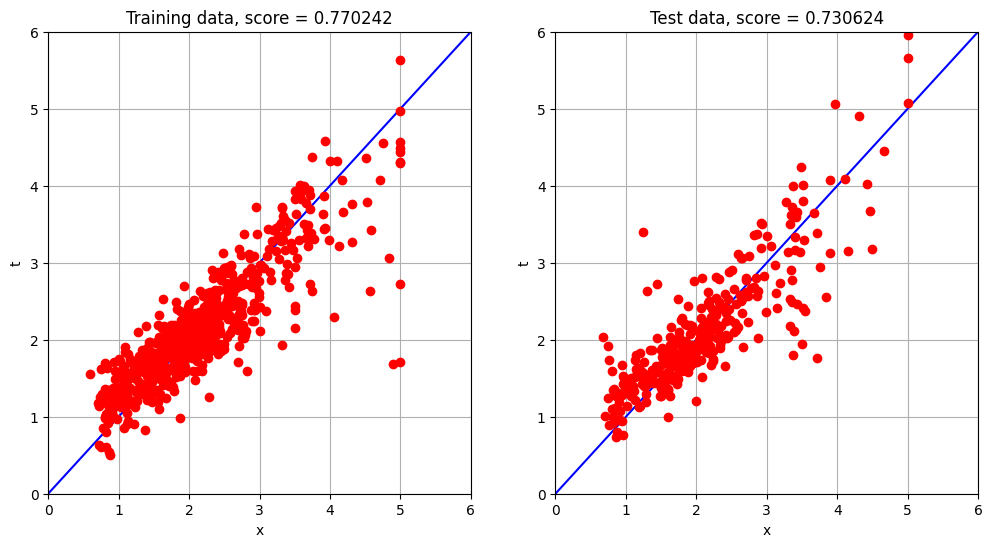

In [23]:
# Dibujamos, para training y test, ypred frente a y:
plt.figure(figsize=(12,6))
taxis = [0, 6, 0 , 6]
xplot = [0, 6]

# Datos de training:
plt.subplot(121)
plotData(xplot, xplot, 'b-', taxis, "")
plotData(ytrain, ytrain_pred, 'ro', taxis, "Training data, score = %f" % (clf.score(xtrain, ytrain)))

# Datos de test:
plt.subplot(122)
plotData(xplot, xplot, 'b-', taxis, "")
plotData(ytest, ytest_pred, 'ro', taxis, "Test data, score = %f" % (clf.score(xtest, ytest)))

In [24]:
clf_gridsearch.best_estimator_

KernelRidge(alpha=0.1, coef0=1.0, gamma=0.01, kernel='poly')

In [25]:
ix = np.argmax(clf_gridsearch.cv_results_['mean_test_score'])

In [26]:
clf_gridsearch.cv_results_['mean_test_score'][ix]

0.7036577328221979

In [27]:
clf_gridsearch.cv_results_['params'][ix]

{'alpha': 0.1, 'coef0': 1.0, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}

In [28]:
clf_gridsearch.best_estimator_.degree

3